In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scipy
from scipy.integrate import odeint

import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import lmfit
from lmfit.lineshapes import gaussian, lorentzian

plt.style.use('fivethirtyeight')
%matplotlib inline 

In [3]:
# parameters 

COUNTRY = 'JPN'  # 'SGP', 'MYS', 'DEU', 'OWID_WRL'

START_DATE = '2020-02-14'

In [4]:
# Parameters
COUNTRY = "USA"
START_DATE = "2020-02-14"


In [5]:
DATA_PATH = '../covid-19-data/public/data/owid-covid-data.csv'
# DATA_PATH = '../covid-19-data/public/data/ecdc/full_data.csv'

df = pd.read_csv(DATA_PATH)
df['date'] = pd.to_datetime(df['date'], yearfirst=True)
df.shape

(23194, 33)

In [6]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,AFG,Asia,Afghanistan,2019-12-31,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
1,AFG,Asia,Afghanistan,2020-01-01,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
2,AFG,Asia,Afghanistan,2020-01-02,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
3,AFG,Asia,Afghanistan,2020-01-03,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
4,AFG,Asia,Afghanistan,2020-01-04,0,0,0,0,0.0,0.0,...,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5


In [7]:
df['iso_code'].value_counts().head(20)

LTU    165
CAN    165
RUS    165
GRC    164
JPN    164
NOR    164
GBR    164
CHN    164
SWE    164
NLD    164
ISR    164
AUS    164
SGP    164
CZE    164
DNK    164
BEL    164
MYS    164
HRV    164
IRN    164
BLR    164
Name: iso_code, dtype: int64

filter country

In [8]:
df_country = df[df['iso_code'] == COUNTRY]
df_country = df_country[df_country['date'] > START_DATE]
df_country

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
21971,USA,North America,United States,2020-02-15,15,0,0,0,0.045,0.000,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
21972,USA,North America,United States,2020-02-16,15,0,0,0,0.045,0.000,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
21973,USA,North America,United States,2020-02-17,15,0,0,0,0.045,0.000,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
21974,USA,North America,United States,2020-02-18,15,0,0,0,0.045,0.000,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
21975,USA,North America,United States,2020-02-19,15,0,0,0,0.045,0.000,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22084,USA,North America,United States,2020-06-07,1920061,22223,109802,659,5800.742,67.138,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
22085,USA,North America,United States,2020-06-08,1942363,22302,110514,712,5868.119,67.377,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
22086,USA,North America,United States,2020-06-09,1961185,18822,111007,493,5924.983,56.864,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
22087,USA,North America,United States,2020-06-10,1979850,18665,112006,999,5981.372,56.389,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77


In [9]:
df_country['date'].max()

Timestamp('2020-06-11 00:00:00')

### weekly case counts

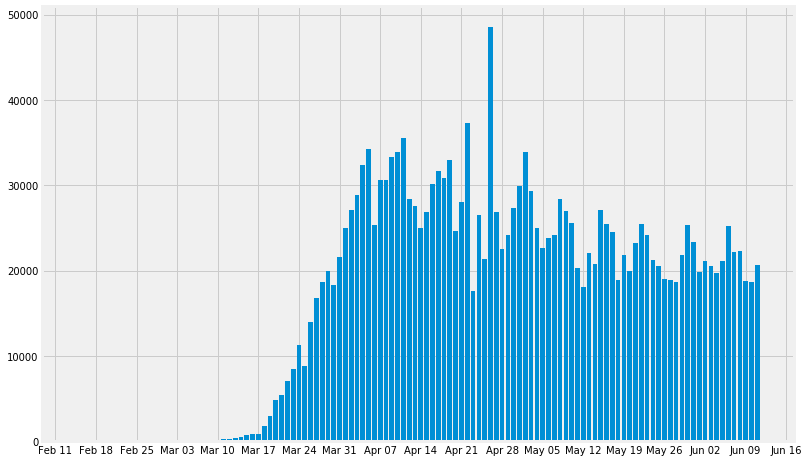

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
    
ax.bar(df_country['date'], df_country['new_cases'])
ax.xaxis_date()
#set ticks every week
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

plt.show()

### cumulative total case counts (log)

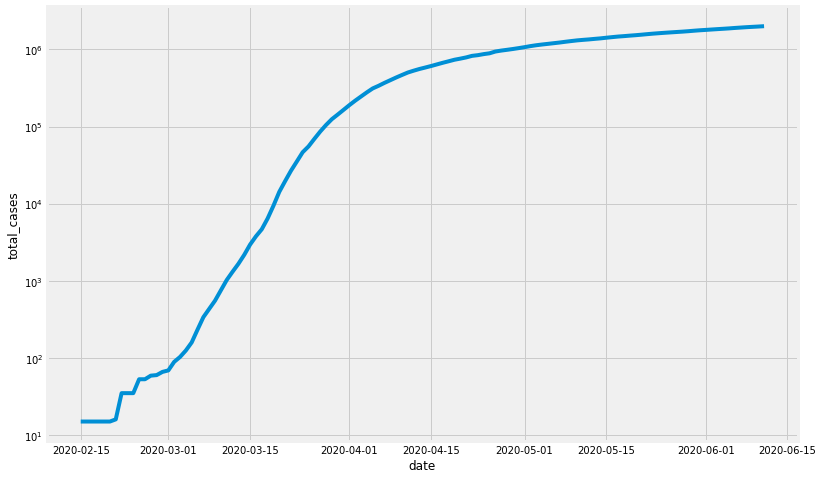

In [11]:
fig, ax = plt.subplots(figsize = (12,8)) 
plt.yscale('log')

sns.lineplot(data=df_country, y='total_cases', x='date', ax=ax)

## SIR model with ODE  

In [12]:
def sir_model(y, t, N, beta, gamma):
    '''
    N: total population
    S(t): no. of susceptible ppl on day t
    I(t): no. of infected ppl on day t
    R(t): no. of recovered on day t
    beta: transmission rate; expected amount of people an infected person infects per day
    D: number of days an infected person has and can spread the disease (from research is 18 days?) 
    gamma: recovery rate; proportion of infected recovering per day (gamma = 1/D)
    R_0: total no. of people an infected person infects (R_0 = beta / gamma)
    '''
    S, I, R = y
    
    dSdt = -beta * S * (I / N)
    dIdt = beta * S * (I / N) - gamma * I
    dRdt = gamma * I
    
    return dSdt, dIdt, dRdt

In [13]:
def plot_sir(t, S, I, R, x_ticks):
    f, ax = plt.subplots(1, 1, figsize=(12,6))
    
    ax.plot(x_ticks, S, 'b', alpha=0.7, linewidth=1, label='Susceptible')  # TODO: t
    ax.plot(x_ticks, I, 'r', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(x_ticks, R, 'y', alpha=0.7, linewidth=1, label='Recovered')

    ax.set_xlabel('Time (days)')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
        
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show();

# curve fitting with actual country data  

In [14]:
data = df_country['new_cases'].values
data

array([    0,     0,     0,     0,     0,     0,     1,    19,     0,
           0,    18,     0,     6,     1,     6,     3,    20,    14,
          22,    34,    74,   105,    95,   121,   200,   271,   287,
         351,   511,   777,   823,   887,  1766,  2988,  4835,  5374,
        7123,  8459, 11236,  8789, 13963, 16797, 18695, 19979, 18360,
       21595, 24998, 27103, 28819, 32425, 34272, 25398, 30561, 30613,
       33323, 33901, 35527, 28391, 27620, 25023, 26922, 30148, 31667,
       30833, 32922, 24601, 28065, 37289, 17588, 26543, 21352, 48529,
       26857, 22541, 24132, 27326, 29917, 33955, 29288, 24972, 22593,
       23841, 24128, 28369, 26957, 25612, 20258, 18117, 22048, 20782,
       27143, 25508, 24487, 18873, 21841, 19970, 23285, 25434, 24147,
       21236, 20568, 19064, 18910, 18721, 21817, 25337, 23297, 19807,
       21086, 20544, 19699, 21140, 25178, 22223, 22302, 18822, 18665,
       20614])

In [15]:
N = 5000000

# find beta & gamma from fitting
# beta = 2.0  # infected person infects 1 other person per day
# D = 14.0  # infections lasts X days
# gamma = 1.0 / D

days = len(data)
days

118

In [16]:
def Model_SIR(days, N, beta, gamma):
    t = np.linspace(0, days-1, days, dtype=int)  # time grid (in days)

    y0 = N-1, 1, 0  # S0, I0, R0

    # Integrate the equations over the time grid, t.
    result = odeint(sir_model, y0, t, args=(N, beta, gamma))
    S, I, R = result.T
    return t, S, I, R

In [17]:
def fit_model(x, N, beta, gamma):
    """
    returns: infections I per day ? 
    """
    return Model_SIR(days, N, beta, gamma)[2][x]

### initiate model & set params

In [18]:
mod = lmfit.Model(fit_model)

mod.set_param_hint("N", value=N, min=0, vary=True)
mod.set_param_hint("beta", value=0.5, min=0, vary=True)
# mod.set_param_hint("gamma", value=1/18, min=1/19, max=1/17, vary=True)
mod.set_param_hint("gamma", value=0.1, min=0, max=1, vary=True)

params = mod.make_params()
params

name,value,initial value,min,max,vary
N,5000000.00,None,0.00000000,inf,True
beta,0.50000000,None,0.00000000,inf,True
gamma,0.10000000,None,0.00000000,1.00000000,True


In [19]:
# fitting

x_data = np.linspace(0, days-1, days, dtype=int)  # time grid (in days)

results = mod.fit(data, params, method="leastsq", x=x_data)  # leastsq, least_squares?

{'N': 35759.598743759,
 'beta': 0.2597269351256597,
 'gamma': 0.00830002066449792}

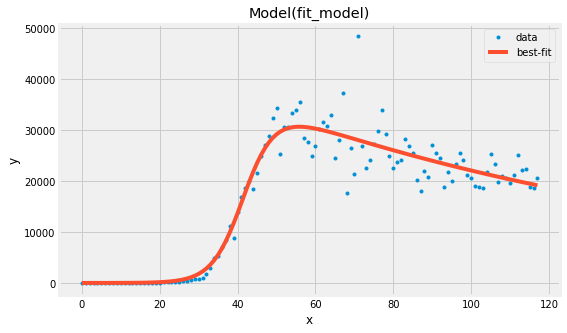

In [20]:
plt.figure(figsize=(8,5))
results.plot_fit(datafmt=".", fitfmt="-");
results.best_values

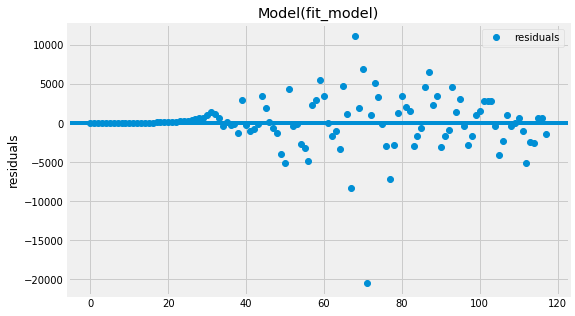

In [21]:
plt.figure(figsize=(8,5))
results.plot_residuals()

In [22]:
results

In [23]:
# gamma should be close to this: 
1/18

0.05555555555555555

In [24]:
def plot_sir2(t, S, I, R, x_ticks, COUNTRY):
    f, ax = plt.subplots(1, 1, figsize=(12,8))
    ax.set_title('Country: %s' % COUNTRY, fontsize= 20) 
    
    ax.plot(x_ticks, S, 'b', alpha=0.7, linewidth=1, label='Susceptible')  # TODO: t
    ax.plot(x_ticks, I, 'r', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(x_ticks, R, 'y', alpha=0.7, linewidth=1, label='Recovered')

    ax.set_xlabel('Time (days)')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    
    # ax.set_ylim(0, 1800)
    
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
        
    # overlay actual data
    ax.bar(df_country['date'], df_country['new_cases'])

    plt.show()

In [25]:
def plot_infected(t, S, I, R, x_ticks, COUNTRY):
    f, ax = plt.subplots(1, 1, figsize=(12,8))
    ax.set_title('Country: %s' % COUNTRY, fontsize= 20) 
    
    ax.plot(x_ticks, I, 'r', alpha=0.7, linewidth=2, label='Infected (prediction)')

    ax.set_xlabel('Time (days)')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    
    # ax.set_ylim(0, 1800)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    
    # overlay actual data
    ax.bar(df_country['date'], df_country['new_cases'])

    plt.show()

In [26]:
max_days = 210
first_date = np.datetime64(df_country['date'].min()) - np.timedelta64(0, 'D')

x_ticks = pd.date_range(start=first_date, periods=max_days, freq="D")

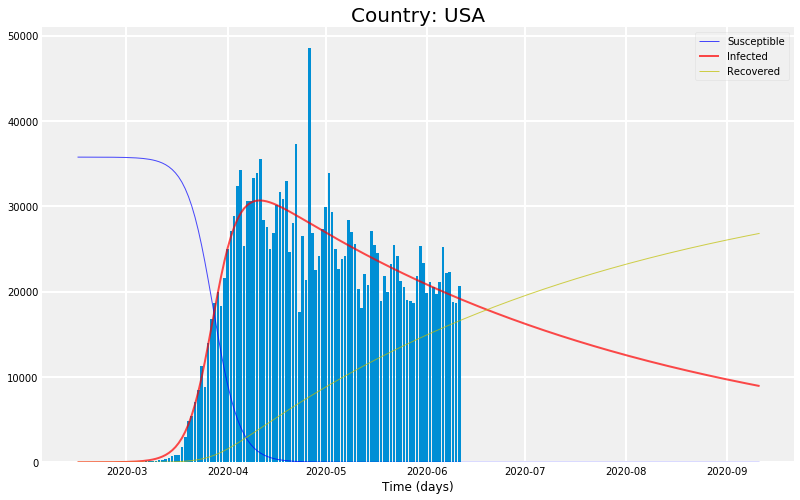

In [27]:
plot_sir2(*Model_SIR(max_days, **results.best_values), x_ticks, COUNTRY)

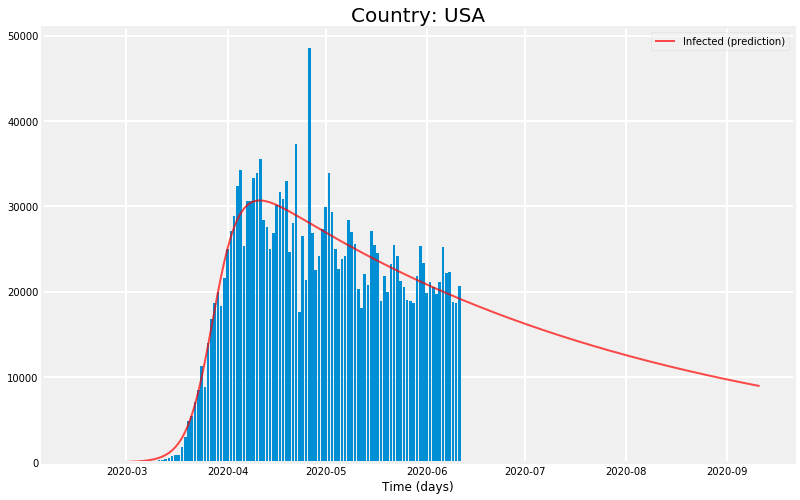

In [28]:
plot_infected(*Model_SIR(max_days, **results.best_values), x_ticks, COUNTRY)

# observations

- It is difficult to make predictions for different countries with the evolving situation and resources available. A country could be at different stages of the outbreak
- A more complicated model could be used e.g. SEIR 